# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [124]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [125]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [126]:
df.shape

(1898, 9)

#### Observations:
There are 1898 Rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The data types are float64(1), int64(4), object(4)

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [128]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False) #df is an argument and a variable. This code finds the sum of null values and sorts them descending.
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) #This argument takes the sum and divides it by the total count to creat a percentage. .69% of HDI data is null.
    missing_data= pd.concat([total, percent], axis=1, keys=['Total','Percent']) #instantiates missing data variable that we will return. using Concatenate from Pandas we put out total and percent vriabels together.  Then using keys we make them a string.
    return missing_data

missing_check(df)

,Total,Percent
order_id,0,0.0
customer_id,0,0.0
restaurant_name,0,0.0
cuisine_type,0,0.0
cost_of_the_order,0,0.0
day_of_the_week,0,0.0
rating,0,0.0
food_preparation_time,0,0.0
delivery_time,0,0.0


#### Observations:
There are no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [129]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
Minimum time is 20 minutes, average is roughly 27 minutes, maximum is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [130]:
df['rating'] = df.rating
df.rating.value_counts()


Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
There are 736 orders that are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [131]:
rating_int = pd.to_numeric(df['rating'], errors = 'coerce')

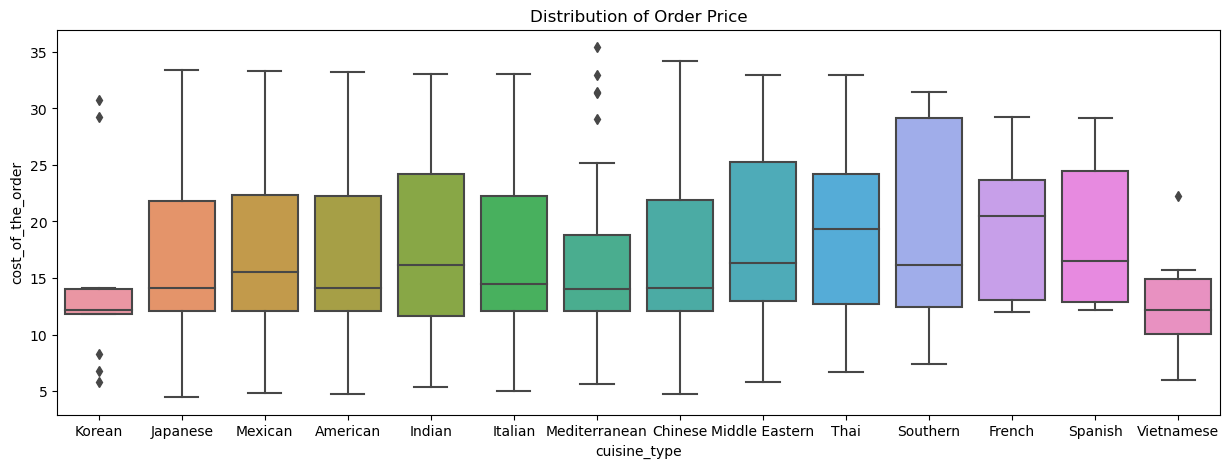

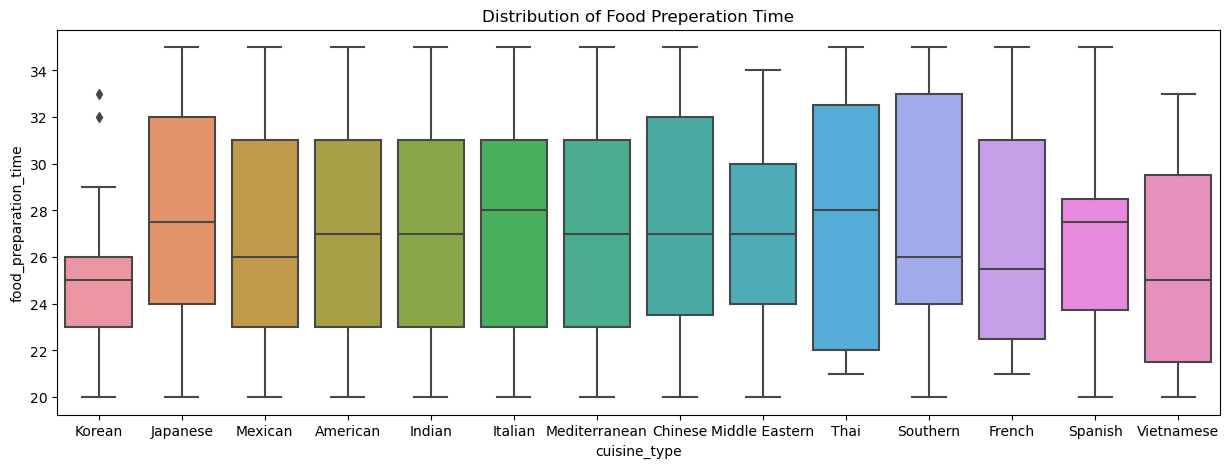

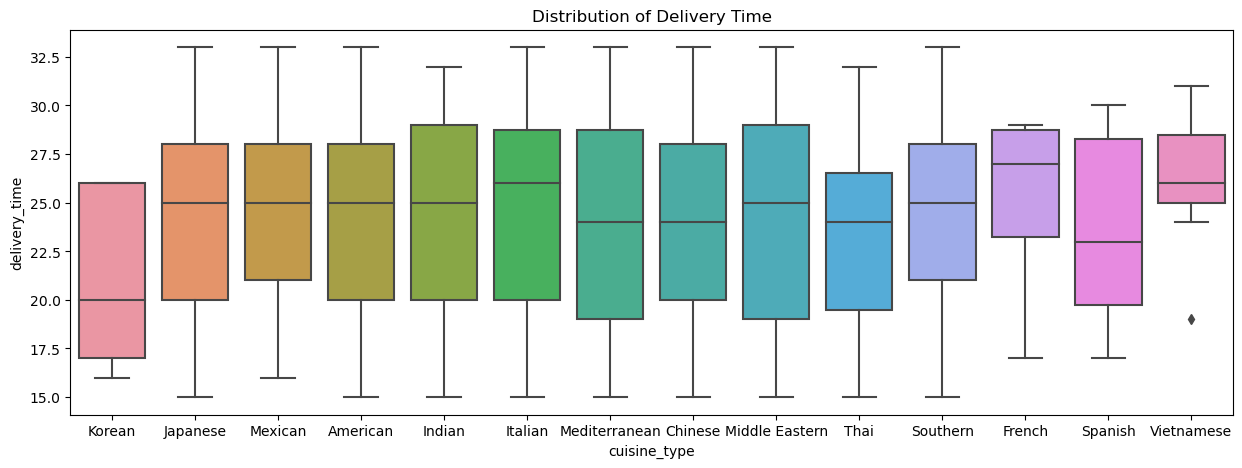

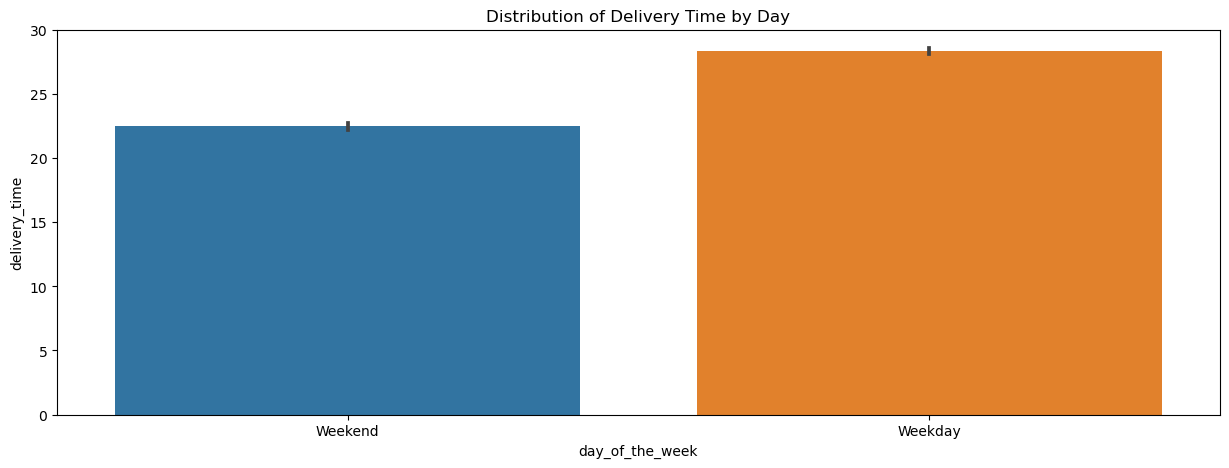

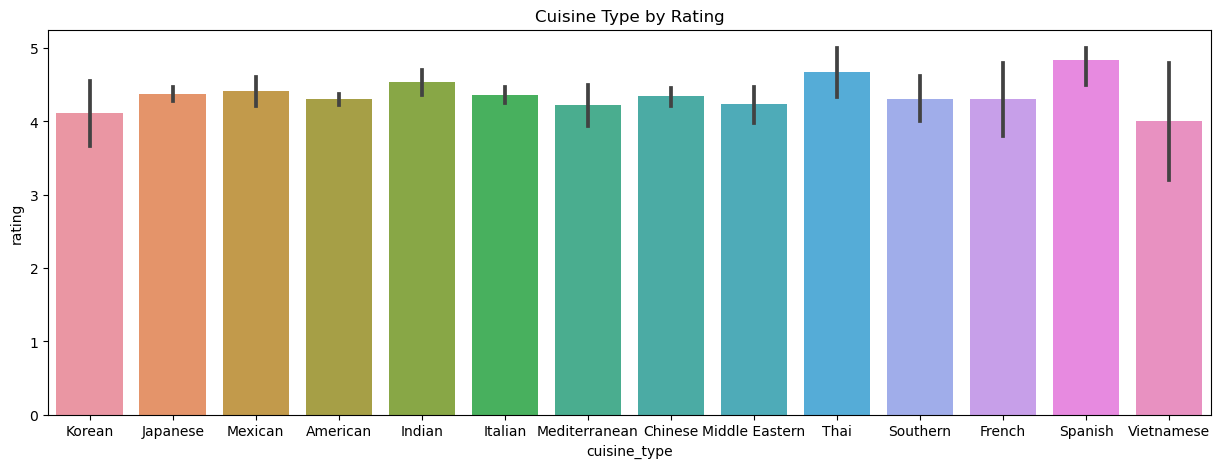

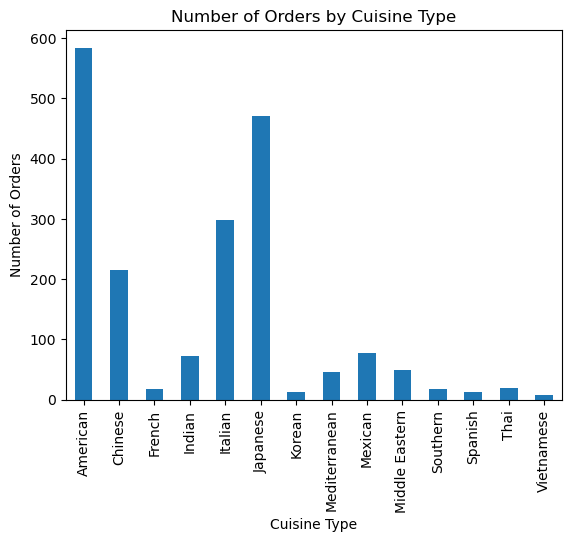

In [132]:
df['rating'] = rating_int
no_of_orders_by_ctype = df.groupby('cuisine_type')['order_id'].count()


plt.figure(figsize=(15,5))
plt.title('Distribution of Order Price')
ax = sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.show()

plt.figure(figsize=(15,5))
plt.title('Distribution of Food Preperation Time')
ax = sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.show()

plt.figure(figsize=(15,5))
plt.title('Distribution of Delivery Time')
ax = sns.boxplot(x='cuisine_type', y='delivery_time', data=df)
plt.show()

plt.figure(figsize=(15,5))
plt.title('Distribution of Delivery Time by Day')
ax = sns.barplot(x='day_of_the_week', y='delivery_time', data=df)
plt.show()

plt.figure(figsize=(15,5))
plt.title('Cuisine Type by Rating')
ax = sns.barplot(x='cuisine_type', y='rating', data=df)
plt.show()

no_of_orders_by_ctype.plot(kind='bar')
plt.title('Number of Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.show()

Observations:

    * Korean Food is the fastest to prepare and fastest to deliver out of all cuisines on average. 
    * Spanish and Thai cuisine are the highest rated
    * Mediterranean Food is quite inexpensive but despite some outliers.
    * Vietnamese is the least expensive of all cuisines on average but also the lowest rated
    * In general delivery is faster on the weekend than the weekday
    * American Cuisine is the most popular, followed by Japanese

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [133]:
orders_per_restaurant = df.groupby('restaurant_name')['order_id'].count()
orders_per_restaurant = orders_per_restaurant.sort_values(ascending=False)
print(orders_per_restaurant)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: order_id, Length: 178, dtype: int64


#### Observations:
The top 5 restuarants are:
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [134]:
orders_per_restaurant_wknd = df.groupby(['cuisine_type', 'day_of_the_week'])['order_id'].count()
orders_per_restaurant_wknd = orders_per_restaurant_wknd.sort_values(ascending=False)
print(orders_per_restaurant_wknd)

cuisine_type    day_of_the_week
American        Weekend            415
Japanese        Weekend            335
Italian         Weekend            207
American        Weekday            169
Chinese         Weekend            163
Japanese        Weekday            135
Italian         Weekday             91
Mexican         Weekend             53
Chinese         Weekday             52
Indian          Weekend             49
Middle Eastern  Weekend             32
Mediterranean   Weekend             32
Mexican         Weekday             24
Indian          Weekday             24
Middle Eastern  Weekday             17
Thai            Weekend             15
Mediterranean   Weekday             14
French          Weekend             13
Korean          Weekend             11
Southern        Weekend             11
Spanish         Weekend             11
Southern        Weekday              6
French          Weekday              5
Thai            Weekday              4
Vietnamese      Weekend         

#### Observations:
American Cuisine is the most popular on weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [135]:
percentage_expensive_orders = (df['cost_of_the_order'] > 20).mean() * 100
print(percentage_expensive_orders)

29.24130663856691


#### Observations:
29.24% of orders cost more than $20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [136]:
avg_delivery_time = df['delivery_time'].mean()
print(avg_delivery_time)

24.161749209694417


#### Observations:
The average delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [137]:
orders_per_customer = df.groupby('customer_id')['order_id'].count()
orders_per_customer = orders_per_customer.sort_values(ascending=False)
print(orders_per_customer)

customer_id
52832     13
47440     10
83287      9
250494     8
65009      7
          ..
105903     1
105992     1
106006     1
106324     1
405334     1
Name: order_id, Length: 1200, dtype: int64


#### Observations:

Top Customer IDs are 52832 (13 Orders), 47440 (10 Orders), 83287 (9 Orders)

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<Figure size 1400x1400 with 0 Axes>

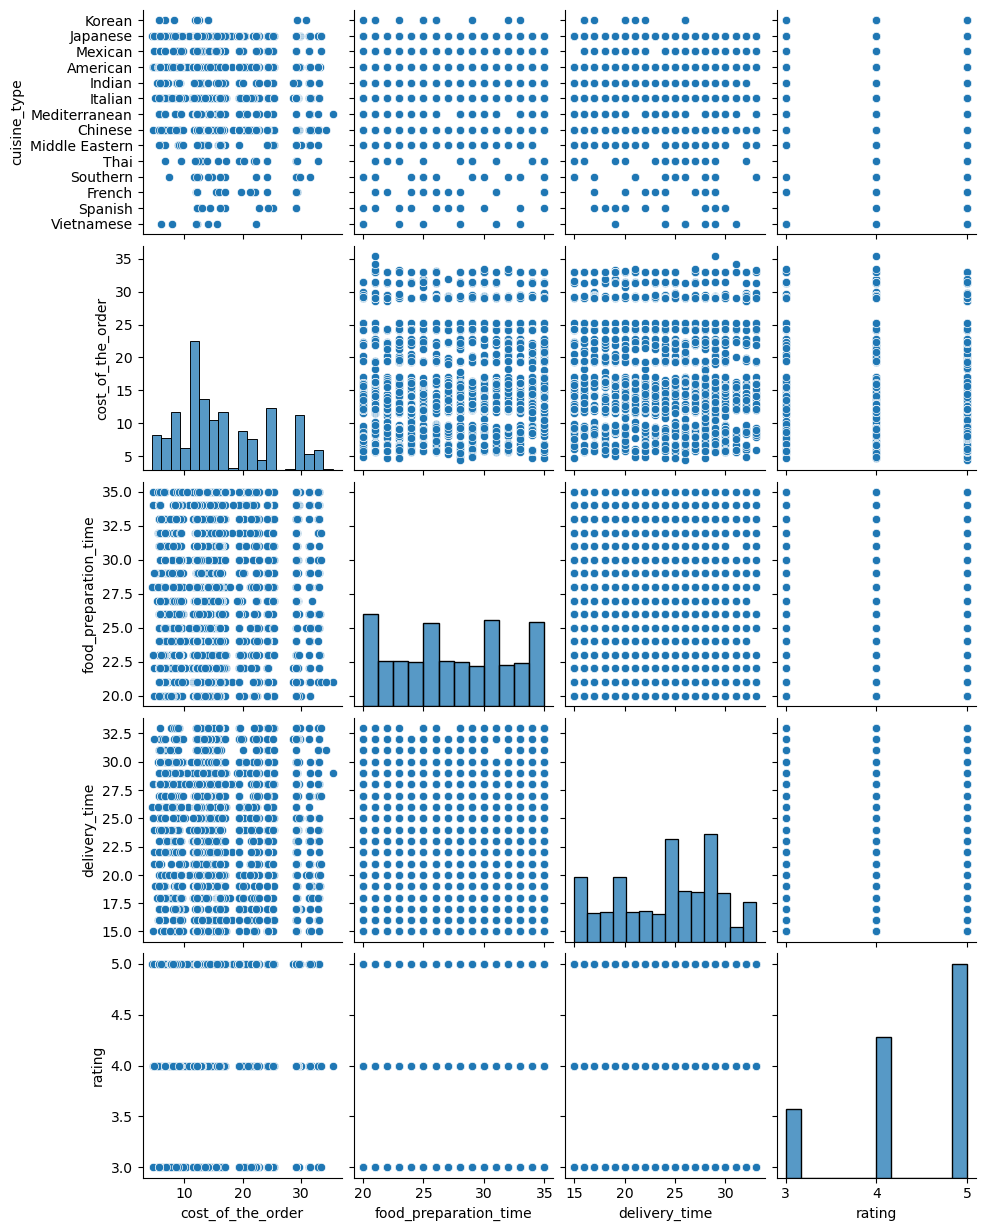

In [138]:
plt.figure(figsize = (14, 14))
sns.pairplot(df, hue=None, x_vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating'], y_vars=['cuisine_type', 'cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating'], kind='scatter', diag_kind='auto', dropna=False)

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [139]:
no_of_ratings = df.groupby('restaurant_name')['rating'].count()
filtered_restaurants = no_of_ratings[no_of_ratings > 50].index
avg_rating = df.groupby('restaurant_name')['rating'].mean()
target_restaurants = avg_rating.loc[filtered_restaurants][avg_rating > 4].index
print(target_restaurants)



Index(['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack',
       'The Meatball Shop'],
      dtype='object', name='restaurant_name')


#### Observations:
Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack',
       'The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [140]:
high_cost = df[df['cost_of_the_order'] > 20]
high_cost['commission'] = high_cost['cost_of_the_order'] * 0.25
high_cost['net_revenue'] = high_cost['cost_of_the_order'] - high_cost['commission']

med_cost = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]
med_cost['commission'] = med_cost['cost_of_the_order'] * 0.15
med_cost['net_revenue'] = med_cost['cost_of_the_order'] - med_cost['commission']

result = pd.concat([high_cost, med_cost])
grouped = result.groupby('order_id')[['cost_of_the_order', 'commission', 'net_revenue']].sum()

print(grouped['net_revenue'])


order_id
1476547     5.8140
1476548     5.8140
1476549     5.7290
1476550    14.4330
1476551    10.3530
            ...   
1478440    10.3105
1478441    21.8250
1478442    22.2975
1478443    22.4100
1478444    23.5725
Name: net_revenue, Length: 1889, dtype: float64


C:\Users\Ernest\AppData\Local\Temp\ipykernel_20228\1636776010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cost['commission'] = high_cost['cost_of_the_order'] * 0.25
C:\Users\Ernest\AppData\Local\Temp\ipykernel_20228\1636776010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cost['net_revenue'] = high_cost['cost_of_the_order'] - high_cost['commission']
C:\Users\Ernest\AppData\Local\Temp\ipykernel_20228\1636776010.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

#### Observations:
Net Revenue would be $25105.78

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [141]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
slow_orders = df[df['total_time'] > 60]
percent_slow_orders = len(slow_orders) /len (df) * 100
print(percent_slow_orders)

10.537407797681771


#### Observations:
10.5 percent of orders take more than 60 minutes to get delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [142]:
avg_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()
print(avg_delivery_time)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
Average delivery time is around 6 minutes faster on weekends compared to weekdays

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  American Cuisine is the most popular. American restaurants comprise of the most orders and have the a low median price to the consumer. The most notable American Restaurant is Shake Shack, which garners the most orders of all. American food is especially popular on weekend. Japanese cuisine is a close second.
* Korean food is the fastes to deliver, this may be due to its low prep time. 
* As far a revenue about 29% of orders are over 20 dollars and thus qualify for a 25% commission on the order
* French cuisine has a median price of over 20 dollars per order. 

### Recommendations:

*  It may be wise to place more emphasis on French and Thai cuisine as their median order cost is over 20 dollars and could secure more revenue should the pupularity increase. On the other hand the speed of Korean Cuisine deliveries can mean more volume. 
*  Weekend promotions may yeild more opportunity as well as delivery times are faster on the weekend. 

---